In [1]:
# Purpose # We want to draft a figure with colored amino acid sequences for Hif1a adn Cited2
    # 1 # create a color map using the same parameters as CIDER
    # 2 # use a csv ( with all sequences - including subscripts in mutant names) in order to name and 
    # 3 # plot sequences onto the figure
    
import matplotlib.pyplot as plt
from matplotlib.colors import to_rgba
import matplotlib.font_manager as fm
import pandas as pd


In [2]:
 # defining the color map for amino acids - same as CIDER
def color_sequence(sequence):
    color_map = {
        'D': 'red', 'E': 'red',
        'R': 'blue', 'K': 'blue',
        'G': 'green', 'S': 'green', 'T': 'green', 'H': 'green', 'N': 'green', 'Q': 'green',
        'A': 'black', 'I': 'black', 'L': 'black', 'V': 'black', 'M': 'black', 'C': 'black',
        'Y': 'orange', 'F': 'orange', 'W': 'orange',
        'P': 'magenta'
    }
    return [color_map.get(amino_acid, 'gray') for amino_acid in sequence]
    

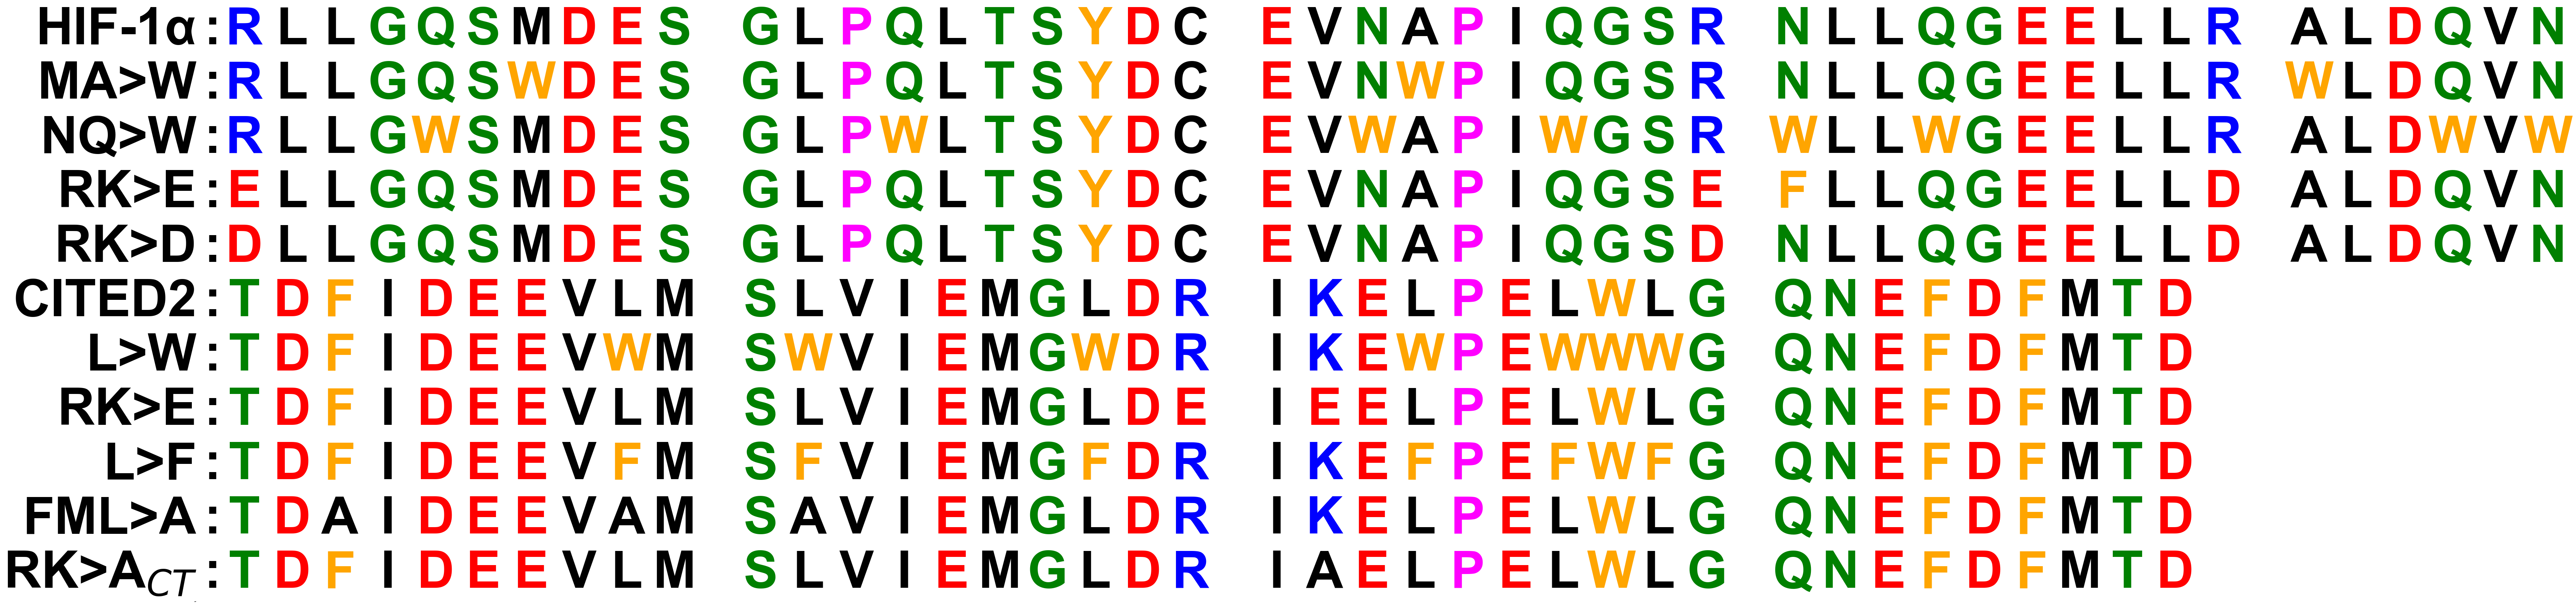

Figure generated: colored_sequences.svg


In [3]:
# defining the function to generate figure with sequences

def generate_figure(csv_file, output_file):
    df = pd.read_csv(csv_file)
    
    # validate data - making sure there's no missing values in the sequence column of csv
    for index, row in df.iterrows():
        if not isinstance(row['sequence'], str):
            print(f"Warning: Invalid sequence for {row['name']} at row {index + 2}. Skipping this row.")
            df = df.drop(index)
    
    if df.empty:
        print("Error: No valid sequences found in the CSV file.")
        return
    
    df['sequence'] = df['sequence'].str.strip()  # Remove any leading/trailing whitespace
    
    # here we establish the parameters for the figure and sequences
    max_sequence_length = df['sequence'].str.len().max()
    sequence_height = 1.5
    figure_width = max_sequence_length * 1.5
    figure_height = len(df) * sequence_height
    fig, ax = plt.subplots(figsize=(figure_width, figure_height))
    
    ax.set_xlim(0, max_sequence_length * 1.5)
    ax.set_ylim(0, len(df) * sequence_height)
    ax.set_axis_off()
    
    # Font parameters #
    ###################
    font_path = fm.findfont(fm.FontProperties(family='Arial', weight='bold'))
    prop = fm.FontProperties(fname=font_path)
    
    # First pass: calculate maximum name width
    max_name_width = 0
    for _, row in df.iterrows():
        name = row['name']
        # Add condition to change HIF1 to HIF1α
        if name == "HIF1":
            name = "HIF1α"
        subscript = str(row['subscript']) if pd.notna(row['subscript']) else ''
        full_name = f"{name}$_{{{subscript}}}$" if subscript else name
        
        
        name_width = ax.text(0, 0, full_name, fontproperties=prop, fontsize=0).get_window_extent(fig.canvas.get_renderer()).width
        #                                              keep this fontsize ^^^^ at 0 ZERO
        max_name_width = max(max_name_width, name_width)
    
    # Calculate positions
    buffer_space = 0.5
    colon_x = (max_name_width / fig.dpi) + buffer_space  # Fixed position for colon
    sequence_start_x = colon_x + 1  # Start position for sequences
    
    # 2 # draw the figure
    total_rows = len(df)
    for idx, (_, row) in enumerate(df.iterrows()):
        name = row['name']
        # making sure Hif-1α is in the correct format
        if name == "HIF1":
            name = "HIF-1α"
        sequence = row['sequence']
        subscript = str(row['subscript']) if pd.notna(row['subscript']) else ''
        full_name = f"{name}$_{{{subscript}}}$" if subscript else name
        
        colors = color_sequence(sequence)
        
        # Calculate y-position (reverse order so first sequence is at the top)
        y_pos = (total_rows - idx - 0.5) * sequence_height
        
        # Draw name with subscript, right-aligned to the colon position
        ax.text(colon_x - buffer_space, y_pos, full_name, fontproperties=prop, fontsize=100, ha='right', va='center')
        
        # Draw colon at fixed position
        ax.text(colon_x, y_pos, ":", fontproperties=prop, fontsize=100, ha='center', va='center')
        
        # Draw sequence
        x_pos = sequence_start_x
        for i, (amino_acid, color) in enumerate(zip(sequence, colors), start=1):
            ax.text(x_pos, y_pos, amino_acid, color=color, fontproperties=prop, fontsize=100, ha='center', va='center')
            x_pos += 1.5
            if i % 10 == 0:
                x_pos += 1.2  # Add an extra space after every 10 letters
    
    plt.tight_layout()
    plt.savefig(output_file, dpi=100, transparent=True)  # Adjust DPI as needed
    plt.show()

# Example usage
csv_file = "manuscript_sequences_NAME.csv"
output_file = "colored_sequences.svg"
generate_figure(csv_file, output_file)
print(f"Figure generated: {output_file}")